<a href="https://colab.research.google.com/github/Ervaxx/Initial_project_ML/blob/main/ML_InitialProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/Machine_Learning_24/Initial_project/Data/AppML_InitialProject_train.csv")

# Display the first few rows of the dataframe
print(df.head())


   averageInteractionsPerCrossing   p_Rhad1    p_Rhad      p_f3   p_weta2  \
0                            16.5  0.028140  0.034668  0.016296  0.011012   
1                            52.5  0.040772  0.390122  0.142628  0.012746   
2                            35.5  0.000104  0.541567  0.009879  0.011151   
3                            35.5  0.001798  0.001132  0.002560  0.010317   
4                            37.5 -0.000654 -0.002517  0.002973  0.010394   

     p_Rphi    p_Reta  p_Eratio      p_f1  p_TRTPID  ...     p_eta     p_phi  \
0  0.952936  0.941933  0.973367  0.268924  0.485597  ...  1.912833  2.718464   
1  0.893606  0.887329  0.423891  0.078007  0.005533  ... -1.035507 -2.297764   
2  0.835072  0.945082  0.053047  0.309687  0.377854  ... -1.087565 -0.355963   
3  0.914065  0.965084  0.978200  0.374573  0.144527  ...  0.759062  0.941293   
4  0.960213  0.925240  0.953828  0.373304  0.267104  ... -0.062211 -0.347417   

   p_charge  p_TruthType  p_truth_pt  p_truth_phi  p_tru

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


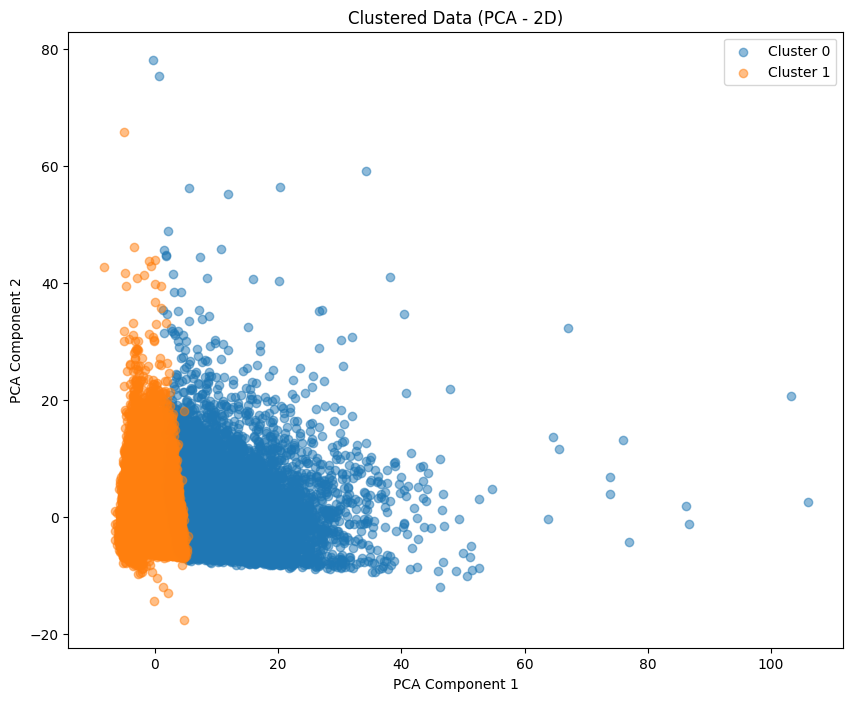

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Assuming df_scaled is your scaled data
# Assuming df is your original dataframe with features

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualization in 2D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Scatter plot for each cluster
for cluster_label in df['cluster'].unique():
    cluster_data = df_pca[df['cluster'] == cluster_label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', alpha=0.5)

# Axes labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_title('Clustered Data (PCA - 2D)')

# Legend
ax.legend()

plt.show()


pX_ecore: 0.7690316183717198
p_TRTTrackOccupancy: 0.056936065622633876
pX_deltaPhi0: 0.04513629482108266
pX_E7x11_Lr1: 0.010478252485810536
pX_E5x7_Lr1: 0.008434820522841113
pX_E5x7_Lr0: 0.006621208868558638
pX_core57cellsEnergyCorrection: 0.005773120778614428
pX_E3x5_Lr2: 0.004819867505268933
pX_topoetcone20ptCorrection: 0.003878917419137403
pX_E7x7_Lr3: 0.002989073406911291
Decision Tree Classifier Accuracy: 0.9806944444444444


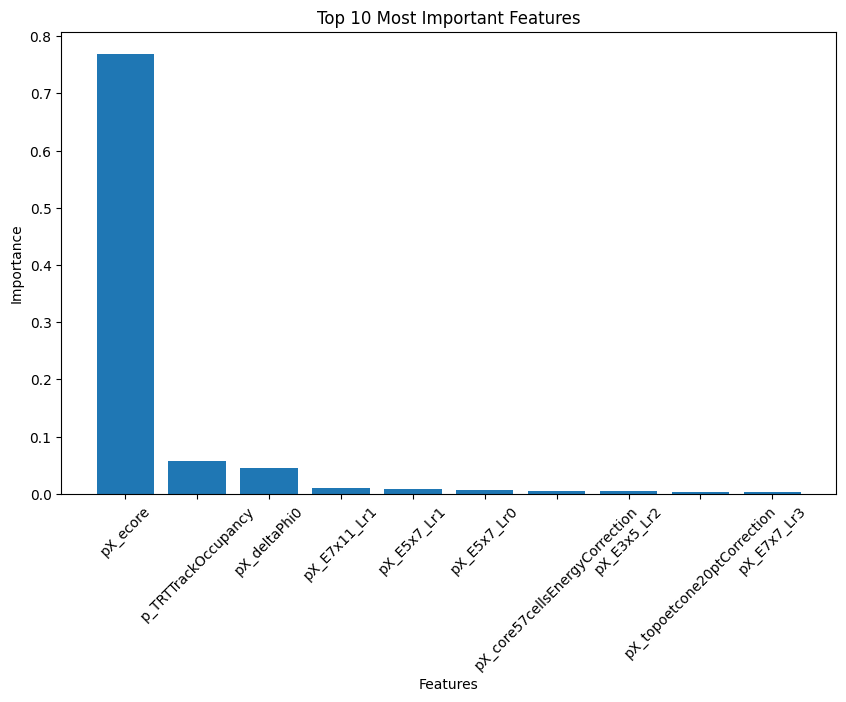

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Select features and target variable
X = df.drop(columns=['cluster'])  # Replace 'target_variable' with the actual target variable name
y = df['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Get the top 10 most important features
top_features = X.columns[indices][:10]
top_importances = feature_importances[indices][:10]

# Print the top 10 most important features and their importances
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

# Calculate accuracy on the test set
accuracy = clf.score(X_test, y_test)
print("Decision Tree Classifier Accuracy:", accuracy)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), top_importances, align='center')
plt.xticks(range(len(top_features)), top_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Most Important Features')
plt.show()


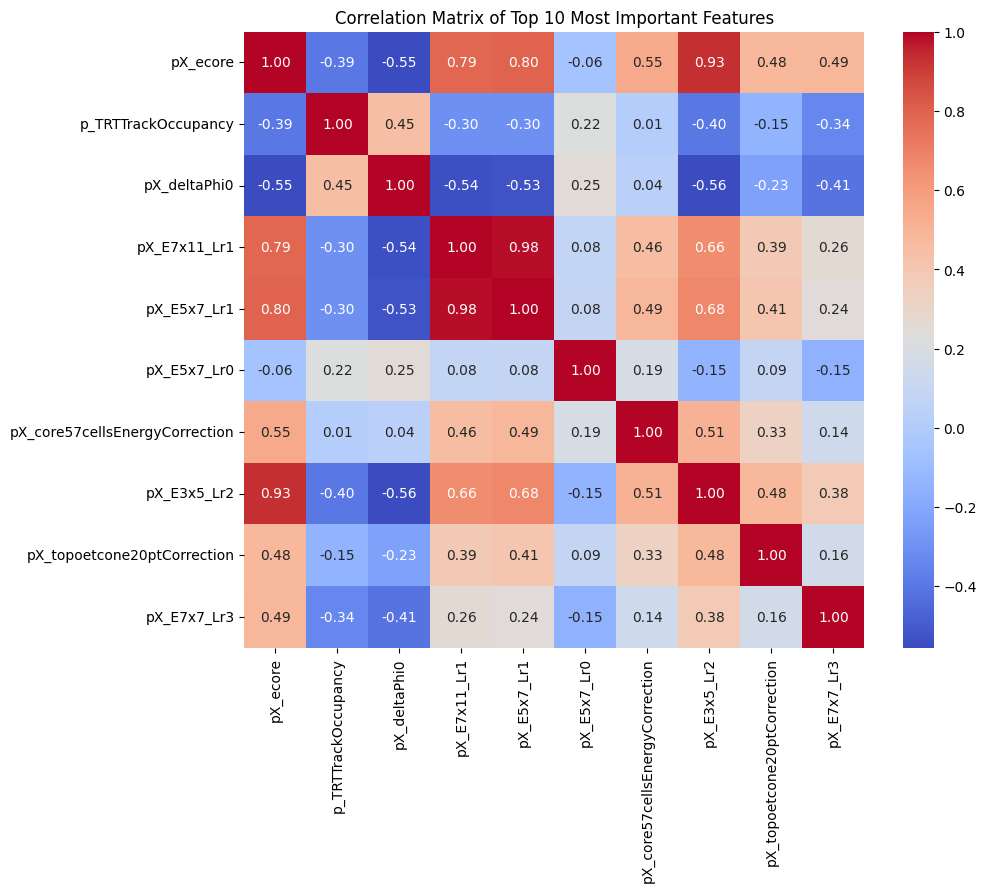

In [ ]:

import seaborn as sns# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Get the top 10 most important features
top_features = X.columns[indices][:10]

# Calculate correlation matrix of top features
top_feature_correlation = X[top_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(top_feature_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top 10 Most Important Features')
plt.show()

In [ ]:
import pandas as pd
import numpy as np




# Set correlation threshold
correlation_threshold = 0.5  # Adjust as needed

# Calculate correlation matrix
correlation_matrix = X.corr().abs()

# Create a mask to select upper triangle of correlation matrix
upper_triangle_mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation above threshold
correlated_features = [column for column in upper_triangle_mask.columns if any(upper_triangle_mask[column] > correlation_threshold)]

# Remove correlated features
selected_features = [feature for feature in selected_features if feature not in correlated_features]

# Print selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['averageInteractionsPerCrossing', 'p_Rhad1', 'p_f3', 'p_weta2', 'p_Rphi', 'p_Reta', 'p_Eratio', 'p_f1', 'p_TRTPID', 'p_numberOfInnermostPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_z0', 'p_d0', 'p_sigmad0', 'p_dPOverP']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define features (X) and target variable (y)

X = df[selected_features]
y = df['cluster']  # Replace 'target_variable' with the actual target variable name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on test data
_, accuracy = model.evaluate(X_test_scaled, y_test)
print("Neural Network Accuracy:", accuracy)

Epoch 1/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.2260 - accuracy: 0.9225
Epoch 2/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.2086 - accuracy: 0.9262
Epoch 3/10
4500/4500 [==============================] - 8s 2ms/step - loss: 0.2030 - accuracy: 0.9271
Epoch 4/10
4500/4500 [==============================] - 9s 2ms/step - loss: 0.1993 - accuracy: 0.9278
Epoch 5/10
4500/4500 [==============================] - 30s 7ms/step - loss: 0.1963 - accuracy: 0.9288
Epoch 6/10
4500/4500 [==============================] - 11s 2ms/step - loss: 0.1939 - accuracy: 0.9295
Epoch 7/10
4500/4500 [==============================] - 8s 2ms/step - loss: 0.1928 - accuracy: 0.9297
Epoch 8/10
4500/4500 [==============================] - 9s 2ms/step - loss: 0.1915 - accuracy: 0.9302
Epoch 9/10
4500/4500 [==============================] - 9s 2ms/step - loss: 0.1906 - accuracy: 0.9302
Epoch 10/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0

In [ ]:

top_importances = feature_importances[indices][:len(selected_features)]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define features (X) and target variable (y)

X = df[top_features]
y = df['cluster']  # Replace 'target_variable' with the actual target variable name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on test data
_, accuracy = model.evaluate(X_test_scaled, y_test)
print("Neural Network Accuracy:", accuracy)

Epoch 1/10
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0395 - accuracy: 0.9848
Epoch 2/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0293 - accuracy: 0.9879
Epoch 3/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0284 - accuracy: 0.9879
Epoch 4/10
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0280 - accuracy: 0.9882
Epoch 5/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0276 - accuracy: 0.9884
Epoch 6/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0273 - accuracy: 0.9884
Epoch 7/10
4500/4500 [==============================] - 13s 3ms/step - loss: 0.0271 - accuracy: 0.9885
Epoch 8/10
4500/4500 [==============================] - 17s 4ms/step - loss: 0.0268 - accuracy: 0.9887
Epoch 9/10
4500/4500 [==============================] - 8s 2ms/step - loss: 0.0267 - accuracy: 0.9886
Epoch 10/10
1125/1125 [==============================] - 2s 1ms/step - los

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.9 MB/s eta 0:00:00


In [ ]:
y

,pX_ecore,p_TRTTrackOccupancy,pX_deltaPhi0,pX_E7x11_Lr1,pX_E5x7_Lr1,pX_E5x7_Lr0,pX_core57cellsEnergyCorrection,pX_E3x5_Lr2,pX_topoetcone20ptCorrection,pX_E7x7_Lr3
123137,52000.5660,0.324848,-0.052587,10192.4680,10005.0320,6309.73300,22967.6020,27577.8850,-144.164100,3861.036100
130504,98711.2200,0.546000,-0.000200,29597.0980,29141.7540,21115.07200,56641.7500,45543.7460,-99.454570,845.120060
31166,44040.1250,0.567500,-0.089618,19592.3400,19409.5740,9757.86200,24089.5860,27869.2930,907.121030,279.464260
26262,42625.7460,0.490000,-0.032904,9321.3730,9568.4890,668.47797,42717.4200,30896.1640,-184.053920,314.058560
64868,121145.8300,0.000000,-999.000000,12800.9240,13084.4375,0.00000,22714.8070,58881.2030,-80.011406,43213.656000
...,...,...,...,...,...,...,...,...,...,...
54717,15272.1910,0.350000,0.005685,4254.3230,4147.8960,1390.78740,16429.4820,9735.2330,-598.233200,251.304490
163501,6344.0405,0.191429,-999.000000,5496.9120,5180.4697,416.43604,6582.5356,4376.4746,-369.583340,-21.211058
32902,91671.3100,0.561750,0.019557,23349.7070,23445.3980,9315.62100,34809.2030,56085.3600,240.296330,452.130460
43061,23440.2250,0.680000,0.056656,11054.7090,10219.5740,576.56810,27132.7910,13511.9750,-415.042080,813.010000


100%|===================| 35891/36000 [03:15<00:00]       

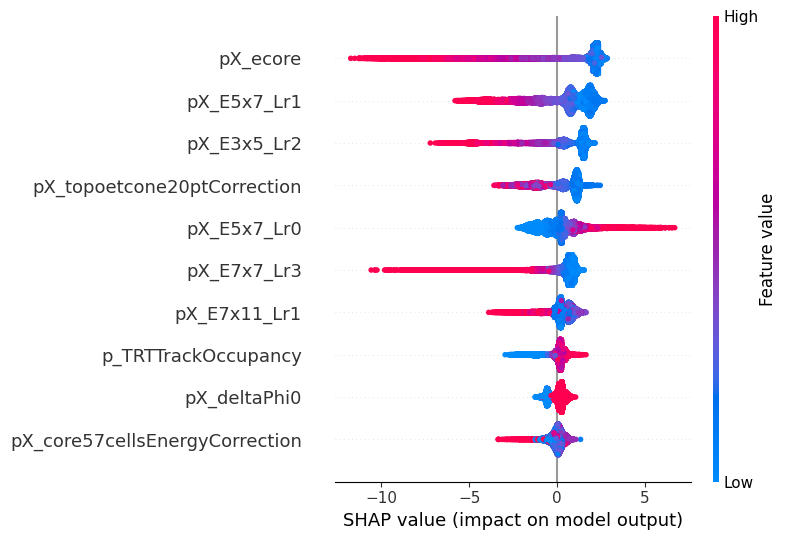

In [ ]:
import shap

# Explain the model's predictions using SHAP
explainer_xgb = shap.Explainer(clf, X_train)
shap_values_xgb = explainer_xgb(X_test)


In [ ]:
initjs()

NameError: name 'initjs' is not defined

In [ ]:
import shap
# Initialize the JavaScript library
shap.initjs()
# Assuming you have already calculated shap_values_xgb for a single test instance

# Select the force plot for a specific test sample (adjust index if needed)
shap_force = shap_values_xgb[0]  # Assuming shap_values_xgb contains SHAP values for multiple samples

# Create the force plot visualization
shap.plots.force(shap_force)


In [ ]:
X_test.iloc[2, :]

pX_ecore                          44040.125000
p_TRTTrackOccupancy                   0.567500
pX_deltaPhi0                         -0.089618
pX_E7x11_Lr1                      19592.340000
pX_E5x7_Lr1                       19409.574000
pX_E5x7_Lr0                        9757.862000
pX_core57cellsEnergyCorrection    24089.586000
pX_E3x5_Lr2                       27869.293000
pX_topoetcone20ptCorrection         907.121030
pX_E7x7_Lr3                         279.464260
Name: 31166, dtype: float64

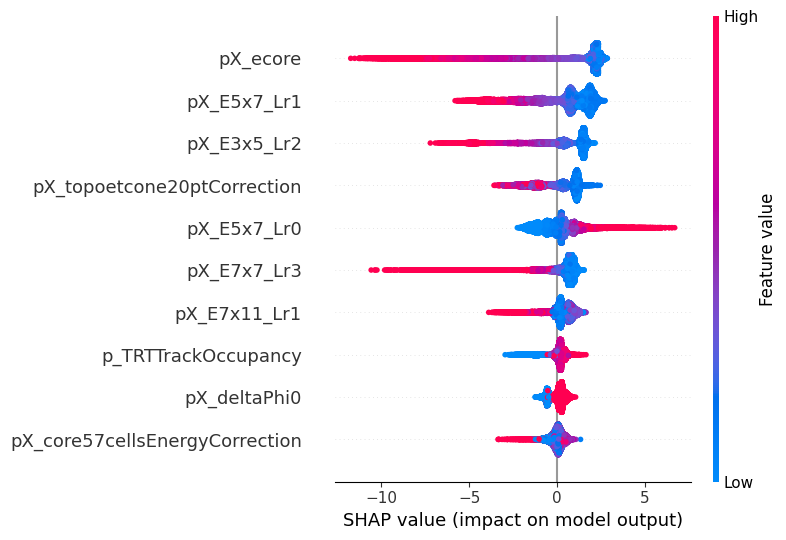

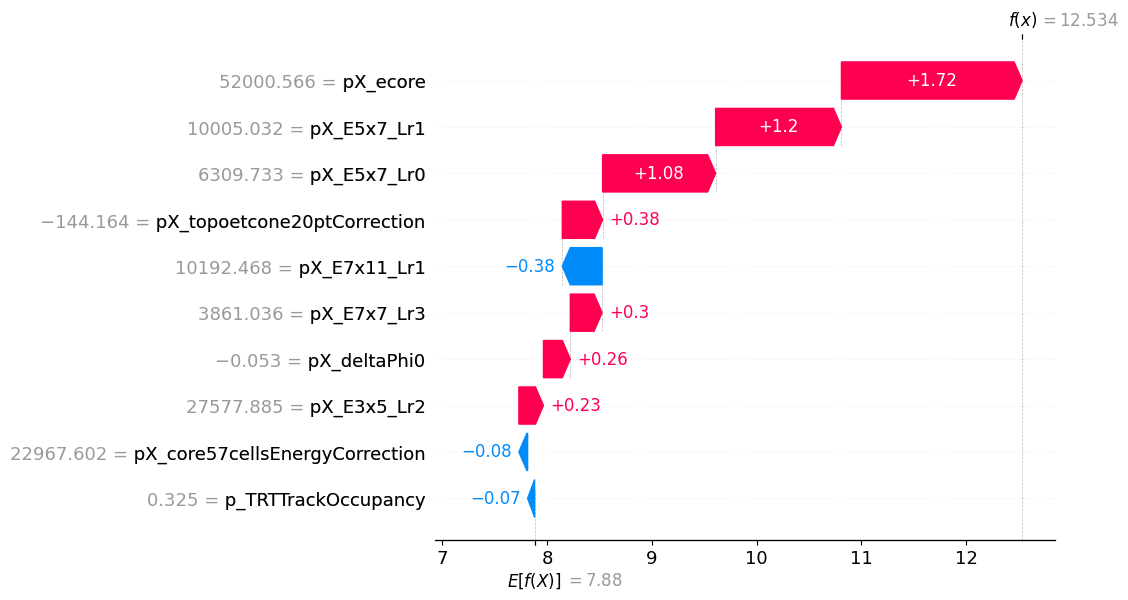

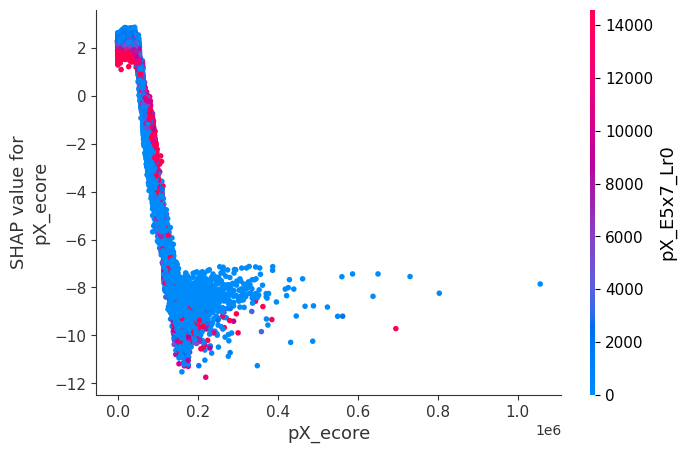

In [ ]:
# Plot the SHAP summary plot
shap.summary_plot(shap_values_xgb, X_test)

# Plot the SHAP waterfall plot for a single prediction
shap.waterfall_plot(shap_values_xgb[0])

# Plot the SHAP dependence scatter plot for a single feature
shap.dependence_plot("pX_ecore", shap_values_xgb.values, X_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Select features and target variable
X = df[top_features]
y = df['cluster']  # Replace 'target_variable' with the actual target variable name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
clf = xgb.XGBClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Classifier Accuracy:", accuracy)


XGBoost Classifier Accuracy: 0.9867777777777778


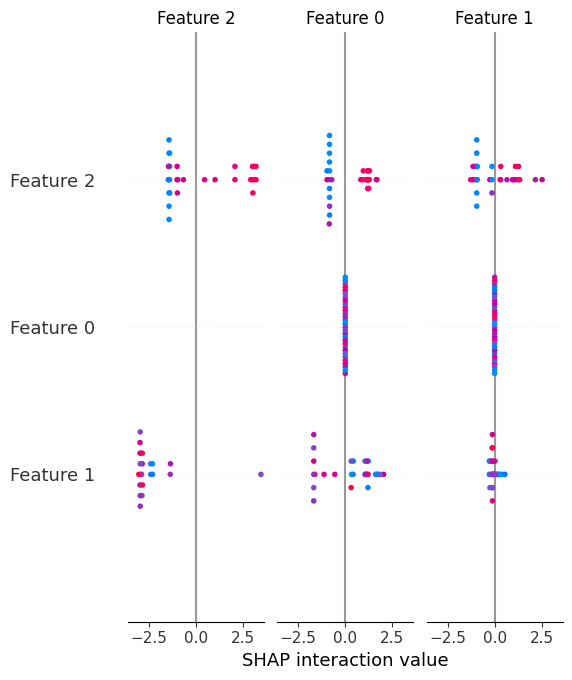

In [ ]:
import shap
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train different classifiers
classifiers = {
    "XGBoost": XGBClassifier(),
    #"Random Forest": RandomForestClassifier(),
    #"Logistic Regression": LogisticRegression(),
    #"SVM": SVC(),
    #"KNN": KNeighborsClassifier()
}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"accuracy": acc, "model": clf}

# Initialize the JavaScript library
shap.initjs()

# Select a single observation to explain
observation_index = 0

# Create HTML summary for each classifier
for name, result in results.items():
    clf = result["model"]
    acc = result["accuracy"]

    # Explain the model's predictions using SHAP
    explainer = shap.Explainer(clf, X_train)
    shap_values = explainer(X_test)

    # Create the force plot for the selected observation
    force_plot_html = shap.summary_plot(shap_values, X_test)

    # Save the force plot as an HTML file
    with open(f"{name}_shap_force_plot.html", "w") as f:
        f.write(f"""
<!DOCTYPE html>
<html>
<head>
    <title>{name} Summary</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f0f0f0;
        }}
        .container {{
            max-width: 800px;
            margin: auto;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            padding: 20px;
        }}
        h1 {{
            text-align: center;
            color: #333;
        }}
        .summary {{
            margin-top: 20px;
            padding: 20px;
            border: 1px solid #ccc;
            border-radius: 10px;
            background-color: #f9f9f9;
        }}
        .summary p {{
            margin: 10px 0;
            font-size: 16px;
            line-height: 1.6;
            color: #666;
        }}
        .shap-plot {{
            margin-top: 20px;
            text-align: center;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>{name} Summary</h1>
        <div class="summary">
            <p><strong>Accuracy:</strong> {acc}</p>
            <p>Here's a SHAP force plot for {name}:</p>
            <div class="shap-plot">
                {force_plot_html}
            </div>
        </div>
    </div>
</body>
</html>
        """)


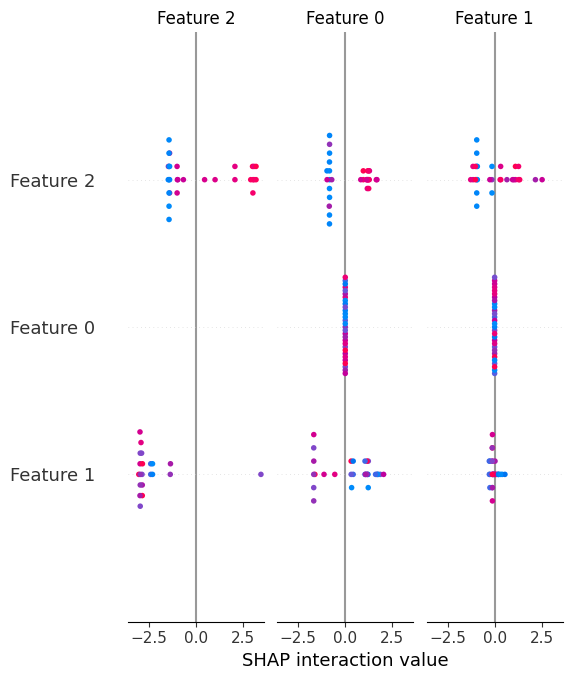

In [ ]:
import shap
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train different classifiers
classifiers = {
    "XGBoost": XGBClassifier(),
    #"Random Forest": RandomForestClassifier(),
    #"Logistic Regression": LogisticRegression(),
    #"SVM": SVC(),
    #"KNN": KNeighborsClassifier()
}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"accuracy": acc, "model": clf}

# Select a single observation to explain
observation_index = 0

# Create HTML summary for each classifier
for name, result in results.items():
    clf = result["model"]
    acc = result["accuracy"]

    # Explain the model's predictions using SHAP
    explainer = shap.Explainer(clf, X_train)
    shap_values = explainer(X_test)

    # Create the force plot for the selected observation
    shap.summary_plot(shap_values, X_test)


    # Save the SHAP force plot as an image
    plt.savefig(f"{name}_shap_force_plot.png")
    plt.close()

    # Write HTML summary
    with open(f"{name}_summary.html", "w") as f:
        f.write(f"""
<!DOCTYPE html>
<html>
<head>
    <title>{name} Summary</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f0f0f0;
        }}
        .container {{
            max-width: 800px;
            margin: auto;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            padding: 20px;
        }}
        h1 {{
            text-align: center;
            color: #333;
        }}
        .summary {{
            margin-top: 20px;
            padding: 20px;
            border: 1px solid #ccc;
            border-radius: 10px;
            background-color: #f9f9f9;
        }}
        .summary p {{
            margin: 10px 0;
            font-size: 16px;
            line-height: 1.6;
            color: #666;
        }}
        .shap-plot {{
            margin-top: 20px;
            text-align: center;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>{name} Summary</h1>
        <div class="summary">
            <p><strong>Accuracy:</strong> {acc}</p>
            <p>Here's a SHAP force plot for {name}:</p>
            <div class="shap-plot">
                <img src="{name}_shap_force_plot.png" alt="SHAP Force Plot">
            </div>
        </div>
    </div>
</body>
</html>
        """)


In [ ]:
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/training.csv")

# Step 2: Dropping unnecessary columns
data.drop(['EventId', 'Weight'], axis=1, inplace=True)

# Step 3: Replacing -999 with NaN
data.replace(to_replace=-999, value=np.nan, inplace=True)

# Step 4: Encoding the 'Label' column
label_dict = {'b': 0, 's': 1}
data.replace({'Label': label_dict}, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
# Train-test split
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 40)

In [ ]:
# Columns with missing values with respective proportions
(data.isna().sum()[data.isna().sum() > 0] / len(data)).sort_values(ascending = False)

DER_deltaeta_jet_jet      0.709828
DER_mass_jet_jet          0.709828
DER_prodeta_jet_jet       0.709828
DER_lep_eta_centrality    0.709828
PRI_jet_subleading_pt     0.709828
PRI_jet_subleading_eta    0.709828
PRI_jet_subleading_phi    0.709828
PRI_jet_leading_pt        0.399652
PRI_jet_leading_eta       0.399652
PRI_jet_leading_phi       0.399652
DER_mass_MMC              0.152456
dtype: float64

In [ ]:
# Discarding columns with more than 30% missing data
cols_missing_drop = [
    'DER_deltaeta_jet_jet',
    'DER_mass_jet_jet',
    'DER_prodeta_jet_jet',
    'DER_lep_eta_centrality',
    'PRI_jet_subleading_pt',
    'PRI_jet_subleading_eta',
    'PRI_jet_subleading_phi',
    'PRI_jet_leading_pt',
    'PRI_jet_leading_eta',
    'PRI_jet_leading_phi'
]
data_train.drop(cols_missing_drop, axis = 1, inplace = True)
data_test.drop(cols_missing_drop, axis = 1, inplace = True)

In [ ]:
# Median imputation
data_train['DER_mass_MMC'].fillna(data_train['DER_mass_MMC'].median(), inplace = True)
data_test['DER_mass_MMC'].fillna(data_test['DER_mass_MMC'].median(), inplace = True)

In [ ]:
# Features-target split
X_train, y_train = data_train.drop('Label', axis = 1), data_train['Label']
X_test, y_test = data_test.drop('Label', axis = 1), data_test['Label']

In [ ]:
# Min-Max normalization
for col in X_train.columns:
    if (X_train[col].dtypes == 'int64' or X_train[col].dtypes == 'float64') and X_train[col].nunique() > 1:
        X_train[col] = (X_train[col] - X_train[col].min()) / (X_train[col].max() - X_train[col].min())
for col in X_test.columns:
    if (X_test[col].dtypes == 'int64' or X_test[col].dtypes == 'float64') and X_test[col].nunique() > 1:
        X_test[col] = (X_test[col] - X_test[col].min()) / (X_test[col].max() - X_test[col].min())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import csv
import time
import signal

# Define a custom exception for timeout
class TimeoutException(Exception):
    pass

# Define a signal handler to handle timeout
def signal_handler(signum, frame):
    raise TimeoutException("Training time exceeded")

# Function to train the model with a time limit
def train_model_with_timeout(X_train, y_train, max_time_seconds):
    model = xgb.XGBClassifier(n_estimators=100, random_state=42)
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(max_time_seconds)  # Set the alarm for the specified time

    try:
        model.fit(X_train, y_train)  # Train the model
    except TimeoutException:
        print("Training time exceeded. Stopping training...")
        pass
    finally:
        signal.alarm(0)  # Reset the alarm

    return model

# Step 7: Train the model with a time limit
max_execution_time = 900  # Maximum execution time in seconds (adjust as needed)
model = train_model_with_timeout(X_train, y_train, max_execution_time)

# Step 8: Make predictions on the testing set
predictions = model.predict(X_train)

# Step 9: Save the predictions to a CSV file
with open("/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/predictions.csv", 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['EventId', 'RankOrder', 'Class'])
    for i, pred in enumerate(predictions):
        writer.writerow([i+1, i+1, pred])

# Step 10: Evaluate the predictions using the evaluation metric code
solutionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/training.csv"  # Use the training file as a dummy solution file
submissionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/predictions.csv"
AMS_metric(solutionFile, submissionFile)


RankOrder column must contain unique values


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import csv
import time
import signal

# Define a custom exception for timeout
class TimeoutException(Exception):
    pass

# Define a signal handler to handle timeout
def signal_handler(signum, frame):
    raise TimeoutException("Training time exceeded")

# Function to train the model with a time limit
def train_model_with_timeout(X_train, y_train, max_time_seconds):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(max_time_seconds)  # Set the alarm for the specified time

    try:
        model.fit(X_train, y_train)  # Train the model
    except TimeoutException:
        print("Training time exceeded. Stopping training...")
        pass
    finally:
        signal.alarm(0)  # Reset the alarm

    return model

# Step 1: Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/training.csv")

# Step 2: Dropping unnecessary columns
data.drop(['EventId', 'Weight'], axis=1, inplace=True)

# Step 3: Replacing -999 with NaN
data.replace(to_replace=-999, value=np.nan, inplace=True)

# Step 4: Encoding the 'Label' column
label_dict = {'b': 0, 's': 1}
data.replace({'Label': label_dict}, inplace=True)

# Step 5: Min-Max normalization
for col in data.columns:
    if (data[col].dtypes == 'int64' or data[col].dtypes == 'float64') and data[col].nunique() > 1:
        data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

# Step 6: Features-target split
X_train, y_train = data_train.drop('Label', axis=1), data_train['Label']
X_test, y_test = data_test.drop('Label', axis=1), data_test['Label']

# Step 7: Train the model with a time limit
max_execution_time = 300  # Maximum execution time in seconds (adjust as needed)
model = train_model_with_timeout(X_train, y_train, max_execution_time)

# Step 8: Make predictions on the testing set
predictions = model.predict(X_test)

# Step 9: Save the predictions to a CSV file
with open("/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/predictions.csv", 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['EventId', 'RankOrder', 'Class'])
    for i, pred in enumerate(predictions):
        writer.writerow([i+1, i+1, pred])

# Step 10: Evaluate the predictions using the evaluation metric code
solutionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/training.csv"  # Use the training file as a dummy solution file
submissionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/predictions.csv"
AMS_metric(solutionFile, submissionFile)


NameError: name 'grad_desc' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import csv

# Step 1: Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/training.csv")

# Step 2: Preprocess the data (if necessary)
# Since we don't have preprocessing details, we'll skip this step

# Step 3: Split the data into features (X) and target variable (y)
X = dataset.drop(columns=['EventId', 'Weight', 'Label'])  # Assuming 'EventId', 'Weight', and 'Label' are not features
y = dataset['Label']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions on the testing set
predictions = model.predict(X_test)

# Step 7: Save the predictions to a CSV file
with open("/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/predictions.csv", 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['EventId', 'RankOrder', 'Class'])
    for i, pred in enumerate(predictions):
        writer.writerow([i+1, i+1, pred])


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import csv
import time
import signal

# Define a custom exception for timeout
class TimeoutException(Exception):
    pass

# Define a signal handler to handle timeout
def signal_handler(signum, frame):
    raise TimeoutException("Training time exceeded")

# Function to train the model with a time limit
def train_model_with_timeout(X_train, y_train, max_time_seconds):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(max_time_seconds)  # Set the alarm for the specified time

    try:
        model.fit(X_train, y_train)  # Train the model
    except TimeoutException:
        print("Training time exceeded. Stopping training...")
        pass
    finally:
        signal.alarm(0)  # Reset the alarm

    return model

# Step 1: Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/training.csv")

# Step 2: Preprocess the data (if necessary)
# Since we don't have preprocessing details, we'll skip this step

# Step 3: Split the data into features (X) and target variable (y)
X = dataset.drop(columns=['EventId', 'Weight', 'Label'])  # Assuming 'EventId', 'Weight', and 'Label' are not features
y = dataset['Label']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model with a time limit
max_execution_time = 300  # Maximum execution time in seconds (adjust as needed)
model = train_model_with_timeout(X_train, y_train, max_execution_time)

# Step 6: Make predictions on the testing set
predictions = model.predict(X_test)

# Step 7: Save the predictions to a CSV file
with open("/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/predictions.csv", 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['EventId', 'RankOrder', 'Class'])
    for i, pred in enumerate(predictions):
        writer.writerow([i+1, i+1, pred])

# Step 8: Evaluate the predictions using the evaluation metric code
solutionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/training.csv"  # Use the training file as a dummy solution file
submissionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/predictions.csv"
AMS_metric(solutionFile, submissionFile)


RankOrder column must contain unique values


In [ ]:
# Step 8: Evaluate the predictions using the evaluation metric code
solutionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/training_dummy.csv"  # Use the training file as a dummy solution file
submissionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/predictions.csv"
AMS_metric(solutionFile, submissionFile)

In [ ]:
import os
import csv
import math
from google.colab import drive
drive.mount('/content/drive')

def create_solution_dictionary(solution):
    """ Read solution file, return a dictionary with key EventId and value (weight,label).
    Solution file headers: EventId, Label, Weight """

    solnDict = {}
    with open(solution, 'r') as f:
        soln = csv.reader(f)
        next(soln) # skip header
        for row in soln:
            if row[0] not in solnDict:
                solnDict[row[0]] = (row[1], row[2])
    return solnDict


def check_submission(submission, Nelements):
    """ Check that submission RankOrder column is correct:
        1. All numbers are in [1,NTestSet]
        2. All numbers are unique
    """
    rankOrderSet = set()
    with open(submission, 'r') as f:
        sub = csv.reader(f)
        next(sub) # skip header
        for row in sub:
            rankOrderSet.add(row[1])

    if len(rankOrderSet) != Nelements:
        print('RankOrder column must contain unique values')
        exit()
    elif not set(range(1, Nelements + 1)).issubset(rankOrderSet):
        print('RankOrder column must contain all numbers from [1..NTestSet]')
        exit()
    else:
        return True


def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )
    where b_r = 10, b = background, s = signal, log is natural logarithm """

    br = 10.0
    radicand = 2 *((s + b + br) * math.log(1.0 + s / (b + br)) - s)
    if radicand < 0:
        print('Radicand is negative. Exiting')
        exit()
    else:
        return math.sqrt(radicand)


def AMS_metric(solution, submission):
    """ Prints the AMS metric value to screen.
    Solution File header: EventId, Class, Weight
    Submission File header: EventId, RankOrder, Class
    """

    numEvents = 550000 # number of events = size of test set

    # solutionDict: key=eventId, value=(label, class)
    solutionDict = create_solution_dictionary(solution)

    signal = 0.0
    background = 0.0
    if check_submission(submission, numEvents):
        with open(submission, 'r') as f:
            sub = csv.reader(f)
            next(sub) # skip header
            for row in sub:
                if row[2] == 's': # only events predicted to be signal are scored
                    if solutionDict[row[0]][0] == 's':
                        signal += float(solutionDict[row[0]][1])
                    elif solutionDict[row[0]][0] == 'b':
                        background += float(solutionDict[row[0]][1])

        print('Signal = {}, Background = {}'.format(signal, background))
        print('AMS =', AMS(signal, background))


if __name__ == "__main__":
    # Enter the paths and file names here
    #solutionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/solution_file.csv"
    submissionFile = "/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/submission_file.csv"

    AMS_metric(solutionFile, submissionFile)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Machine_Learning_24/Initial_project/Higgs_Boson/solution_file.csv'